In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [90]:
men = pd.read_csv("men_running_shoes.csv")
women = pd.read_csv("women_running_shoes.csv")

In [91]:
men["sex"].unique()

array(['unisex', "Men's Shoes ", 'men', 'Mens Shoes ', 'women'],
      dtype=object)

In [92]:
men["sex"].value_counts()

Men's Shoes     825
unisex          137
men              21
Mens Shoes        2
women             2
Name: sex, dtype: int64

In [93]:
mens = ["Men's Shoes ", "men", "Mens Shoes "]

filt_men = men["sex"].isin(mens) 

men["sex"][filt_men].value_counts()

Men's Shoes     825
men              21
Mens Shoes        2
Name: sex, dtype: int64

In [94]:
women["sex"].unique()

array(['unisex', 'women', 'men'], dtype=object)

In [95]:
women["sex"].value_counts()

women     864
unisex    136
men         1
Name: sex, dtype: int64

In [96]:
filt_women = women["sex"] == "women"

women["sex"][filt_women].value_counts()

women    864
Name: sex, dtype: int64

In [97]:
women["price"][filt_women].mean()

149.2979513888878

In [98]:
men["price"][filt_men].mean()

150.18962264150832

# **1. On avergae which which shoes are more expensive? men or women?**

In [99]:
men["price"].mean()

148.5253394123598

In [100]:
women["price"].mean()

147.5198201798194

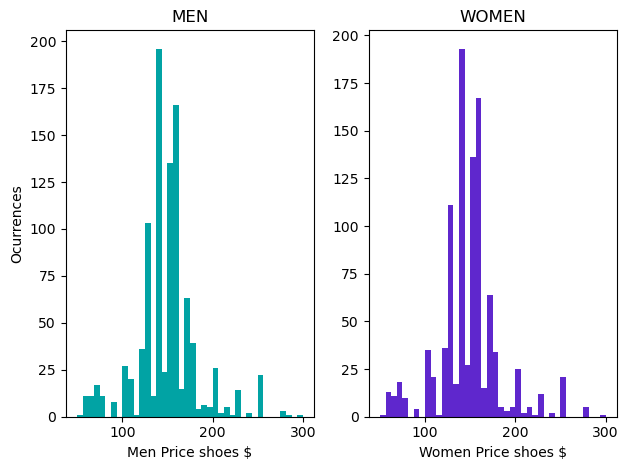

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist(men["price"], bins = 40, color = "#01a3a4", label = "men")
ax1.set_title("MEN")
ax1.set_xlabel("Men Price shoes $")
ax1.set_ylabel("Ocurrences")

ax2.hist(women["price"], bins = 40, color = "#5f27cd", label = "women")
ax2.set_title("WOMEN")
ax2.set_xlabel("Women Price shoes $")

plt.tight_layout()

In [102]:
men["price"].min()

49.95

In [103]:
fil_min = men["price"] == 49.95

men[fil_min]

,Unnamed: 0,title,brand,model,price,discount,discount_%,sex,colour,cushioning,stability,best_use_surface,midsole,outsole,upper,link_shoes
231,231,Birkenstock Arizona EVA,Birkenstock,Arizona EVA,49.95,0.0,0.0,men,Black,NaN,NaN,NaN,no information,no information,no information,https://www.runningwarehouse.com/Birkenstock_A...


In [104]:
men["price"].max()

299.95

In [105]:
women["price"].min()

49.95

In [106]:
fil_min = women["price"] == 49.95

women[fil_min]

,Unnamed: 0,title,brand,model,price,discount,discount_%,sex,colour,cushioning,stability,best_use_surface,midsole,outsole,upper,link_shoes
244,244,Birkenstock Arizona EVA,Birkenstock,Arizona EVA,49.95,0.0,0.0,women,White,NaN,NaN,NaN,"EVA foamis light, insulated, and sustainable.",Rubber outsolewith strategic groove placement ...,Adjustable Strapswrap across the top of the mi...,https://www.runningwarehouse.com/Birkenstock_A...


In [107]:
women["price"].max()

299.95

histogram of prices between 100 and 200 dollars

In [108]:
filter_price_men = (men["price"] >= 100) & (men["price"] <= 200)
filter_price_women = (women["price"] >= 100) & (women["price"] <= 200)

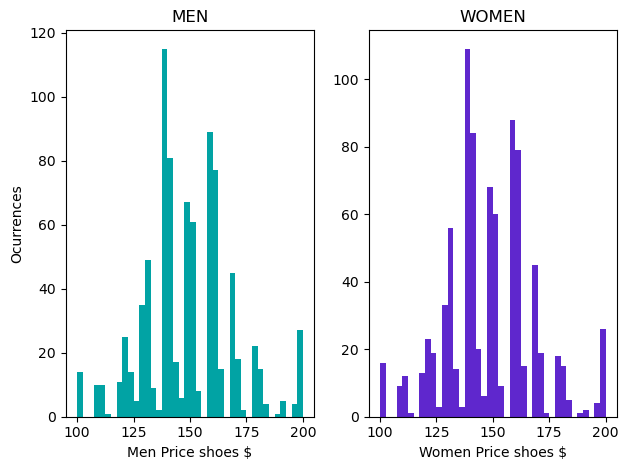

In [109]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist(men[filter_price_men]["price"], bins = 40, color = "#01a3a4", label = "men")
ax1.set_title("MEN")
ax1.set_xlabel("Men Price shoes $")
ax1.set_ylabel("Ocurrences")

ax2.hist(women[filter_price_women]["price"], bins = 40, color = "#5f27cd", label = "women")
ax2.set_title("WOMEN")
ax2.set_xlabel("Women Price shoes $")

plt.tight_layout()

Looks like the price distribution is between 125 and 175 dollars mainly

# **2. Is there a relationship between price and cushioning?**

In [110]:
men["cushioning"]

0      Maximal
1         High
2         High
3         High
4       Medium
        ...   
982     Medium
983        NaN
984        NaN
985        NaN
986        NaN
Name: cushioning, Length: 987, dtype: object

In [111]:
men["cushioning"].unique()

array(['Maximal', 'High', 'Medium', 'Minimal', 'Low', nan], dtype=object)

In [112]:
men["cushioning"] = men["cushioning"].replace(np.nan, "no info")
men["cushioning"]

0      Maximal
1         High
2         High
3         High
4       Medium
        ...   
982     Medium
983    no info
984    no info
985    no info
986    no info
Name: cushioning, Length: 987, dtype: object

In [113]:
mean_price_cushioning = men.groupby("cushioning").mean()
mean_price_cushioning = mean_price_cushioning.sort_values("price")
mean_price_cushioning

,Unnamed: 0,price,discount,discount_%
cushioning,,,,
Minimal,423.583333,107.895000,25.366667,24.810833
no info,508.873134,114.285373,22.877761,15.283358
Medium,517.821883,144.997532,44.799898,31.443664
Low,504.116071,145.764732,45.400357,30.480536
High,472.854902,167.231961,41.480196,26.082353
Maximal,404.641975,173.230864,22.037037,13.395062


Text(0, 0.5, 'Price in Dollars $')

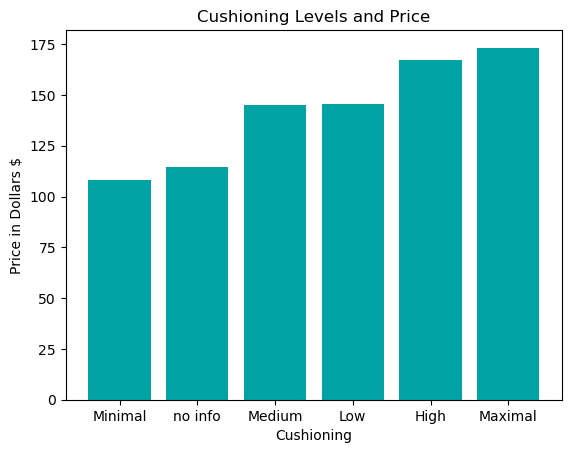

In [114]:
scatter, ax = plt.subplots()

ax.bar(mean_price_cushioning.index, mean_price_cushioning["price"], color = "#01a3a4")
ax.set_title("Cushioning Levels and Price")
ax.set_xlabel("Cushioning")
ax.set_ylabel("Price in Dollars $")

In [115]:
mean_price_stability = men.groupby("stability").mean()
mean_price_stability = mean_price_stability.sort_values("price")
mean_price_stability

,Unnamed: 0,price,discount,discount_%
stability,,,,
Min,496.000000,135.533333,23.316667,21.196667
Mod,517.333333,142.388095,43.183175,29.793651
Max,330.666667,153.320513,83.915385,56.209231
Neutral,496.563342,155.135472,39.292399,26.340943


let's see the mean for the stability in all of these shoes.

Text(0, 0.5, 'Price in Dollars $')

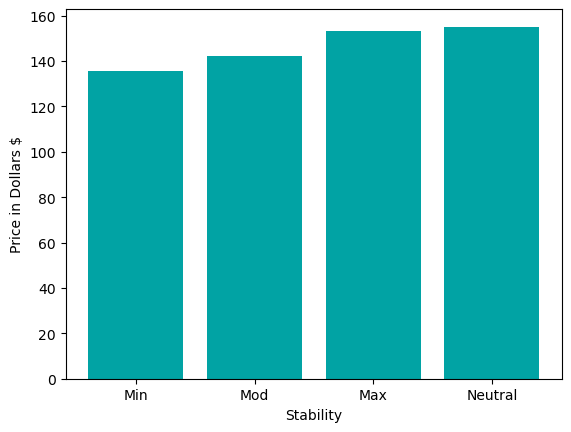

In [116]:
scatter, ax = plt.subplots()

ax.bar(mean_price_stability.index, mean_price_stability["price"], color = "#01a3a4")
ax.set_xlabel("Stability")
ax.set_ylabel("Price in Dollars $")

with cushioning we have more change in the price of the shoe according to these two charts. But how about the distribution for each cushioning category?.

(array([6., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 1.]),
 array([ 89.95  ,  93.4525,  96.955 , 100.4575, 103.96  , 107.4625,
        110.965 , 114.4675, 117.97  , 121.4725, 124.975 , 128.4775,
        131.98  , 135.4825, 138.985 , 142.4875, 145.99  , 149.4925,
        152.995 , 156.4975, 160.    ]),
 <BarContainer object of 20 artists>)

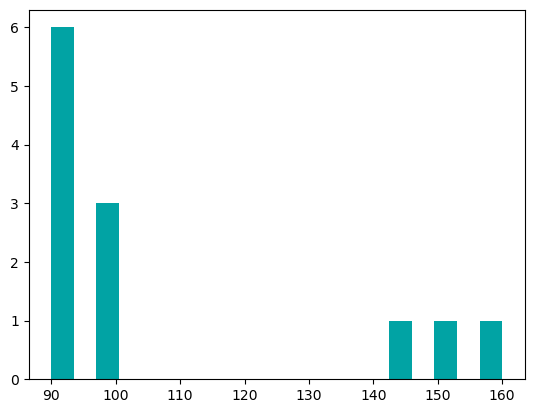

In [117]:
plt.hist(men[men["cushioning"] == "Minimal"]["price"], color = "#01a3a4", bins = 20)

(array([ 4.,  0.,  1.,  0.,  5.,  9., 19., 20.,  3., 14., 14.,  2.,  1.,
         2.,  0.,  0.,  9.,  1.,  3.,  5.]),
 array([ 99.95  , 104.9525, 109.955 , 114.9575, 119.96  , 124.9625,
        129.965 , 134.9675, 139.97  , 144.9725, 149.975 , 154.9775,
        159.98  , 164.9825, 169.985 , 174.9875, 179.99  , 184.9925,
        189.995 , 194.9975, 200.    ]),
 <BarContainer object of 20 artists>)

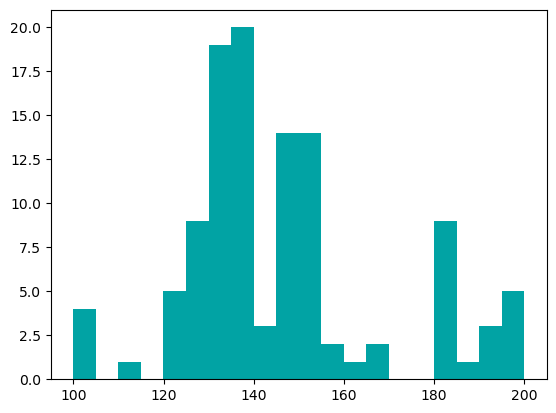

In [118]:
plt.hist(men[men["cushioning"] == "Low"]["price"], color = "#01a3a4", bins = 20)

(array([  9.,  12.,  19.,  12.,  57., 109.,  54.,   0.,  89.,  17.,   6.,
          0.,   3.,   1.,   0.,   0.,   1.,   0.,   0.,   4.]),
 array([ 99.95, 107.45, 114.95, 122.45, 129.95, 137.45, 144.95, 152.45,
        159.95, 167.45, 174.95, 182.45, 189.95, 197.45, 204.95, 212.45,
        219.95, 227.45, 234.95, 242.45, 249.95]),
 <BarContainer object of 20 artists>)

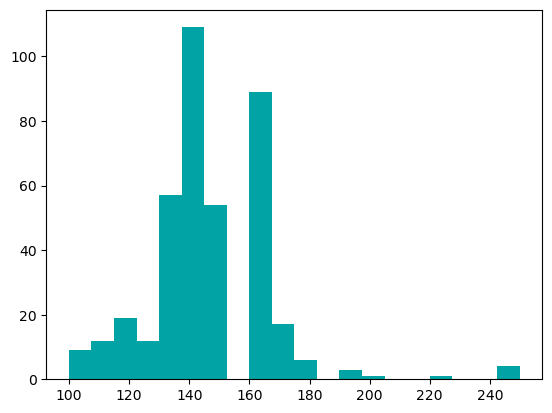

In [119]:
plt.hist(men[men["cushioning"] == "Medium"]["price"], color = "#01a3a4", bins = 20)

(array([ 5.,  1.,  2.,  4., 66., 24., 57., 34., 13.,  1., 16.,  2.,  0.,
        10.,  0.,  1., 15.,  0.,  3.,  1.]),
 array([ 99.95, 109.2 , 118.45, 127.7 , 136.95, 146.2 , 155.45, 164.7 ,
        173.95, 183.2 , 192.45, 201.7 , 210.95, 220.2 , 229.45, 238.7 ,
        247.95, 257.2 , 266.45, 275.7 , 284.95]),
 <BarContainer object of 20 artists>)

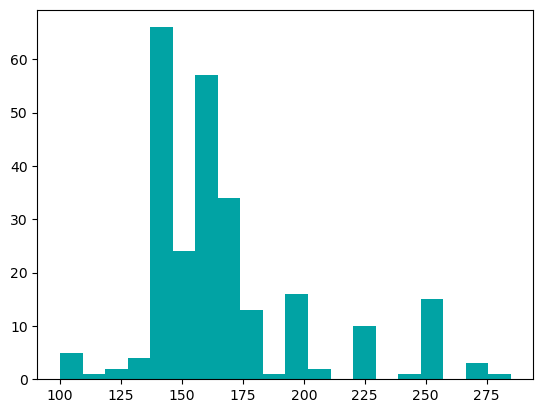

In [120]:
plt.hist(men[men["cushioning"] == "High"]["price"], color = "#01a3a4", bins = 20)

(array([ 1.,  9., 17.,  3., 24.,  7.,  3.,  0.,  7.,  0.,  5.,  2.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([129.95, 138.45, 146.95, 155.45, 163.95, 172.45, 180.95, 189.45,
        197.95, 206.45, 214.95, 223.45, 231.95, 240.45, 248.95, 257.45,
        265.95, 274.45, 282.95, 291.45, 299.95]),
 <BarContainer object of 20 artists>)

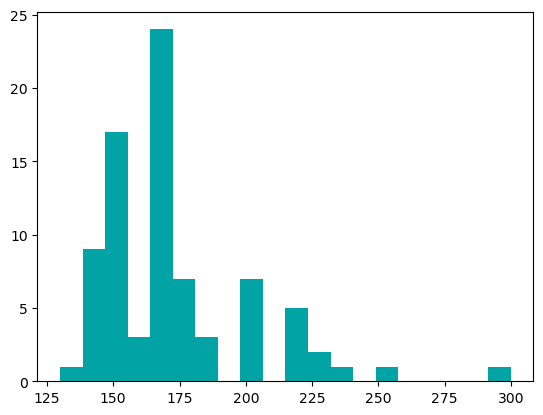

In [121]:
plt.hist(men[men["cushioning"] == "Maximal"]["price"], color = "#01a3a4", bins = 20)

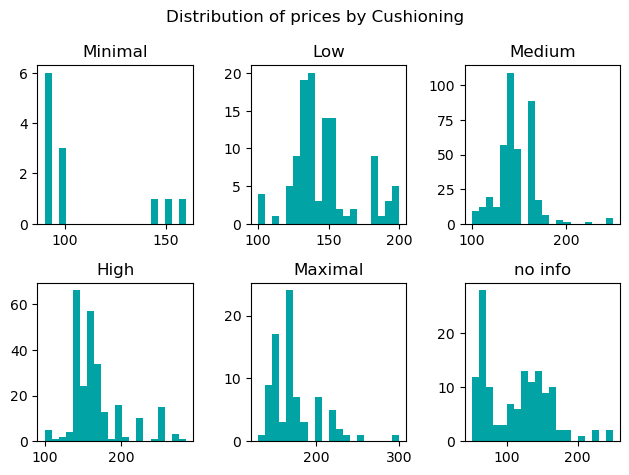

In [122]:
fig, axes = plt.subplots(2, 3)
fig.suptitle("Distribution of prices by Cushioning")

# Plot the data on the figure object
axes[0, 0].hist(men[men["cushioning"] == "Minimal"]["price"], color = "#01a3a4", bins = 20)
axes[0, 0].set_title("Minimal")

axes[0, 1].hist(men[men["cushioning"] == "Low"]["price"], color = "#01a3a4", bins = 20)
axes[0, 1].set_title("Low")

axes[0, 2].hist(men[men["cushioning"] == "Medium"]["price"], color = "#01a3a4", bins = 20)
axes[0, 2].set_title("Medium")

axes[1, 0].hist(men[men["cushioning"] == "High"]["price"], color = "#01a3a4", bins = 20)
axes[1, 0].set_title("High")

axes[1, 1].hist(men[men["cushioning"] == "Maximal"]["price"], color = "#01a3a4", bins = 20)
axes[1, 1].set_title("Maximal")

axes[1, 2].hist(men[men["cushioning"] == "no info"]["price"], color = "#01a3a4", bins = 20)
axes[1, 2].set_title("no info")

plt.tight_layout()
plt.show()

# **3. Now let's look at the average price of these shoes per brand.**

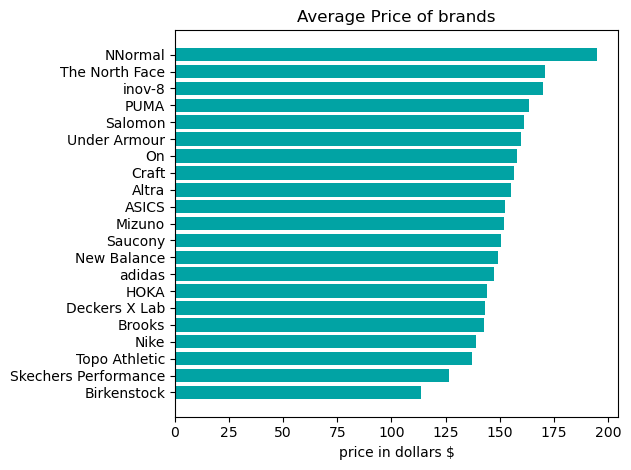

In [123]:
average_brand = men.groupby("brand").mean()

average_brand = average_brand.sort_values("price")

plt.barh(average_brand.index, average_brand["price"], color = "#01a3a4")
plt.title("Average Price of brands")
plt.xlabel("price in dollars $")
plt.tight_layout()

But we need to see how many observations we had per brand.

In [124]:
count_brand = men.groupby("brand").count()

count_brand = count_brand.sort_values("price")

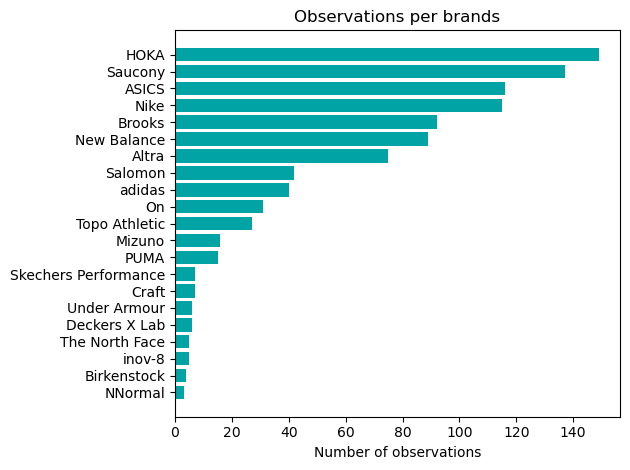

In [125]:
plt.barh(count_brand.index, count_brand["price"], color = "#01a3a4")
plt.title("Observations per brands")
plt.xlabel("Number of observations")
plt.tight_layout()

# **4. % of running shoes that fall into different price ranges**

the range of our prices is between 50 and 300 dollars, so lets create a pie chart to 4 categories of % 

In [126]:
filt_49_100 = (men["price"] >= 49) & (men["price"] <= 100)

men[filt_49_100]["price"].count()

86

In [127]:
filt_100_150 = (men["price"] > 100) & (men["price"] <= 150)

men[filt_100_150]["price"].count()

518

In [128]:
filt_150_200 = (men["price"] > 150) & (men["price"] <= 200)

men[filt_150_200]["price"].count()

332

In [129]:
filt_200_250 = (men["price"] > 200) & (men["price"] <= 250)

men[filt_200_250]["price"].count()

46

In [130]:
filt_250_300 = (men["price"] > 250) & (men["price"] <= 300)

men[filt_250_300]["price"].count()

5

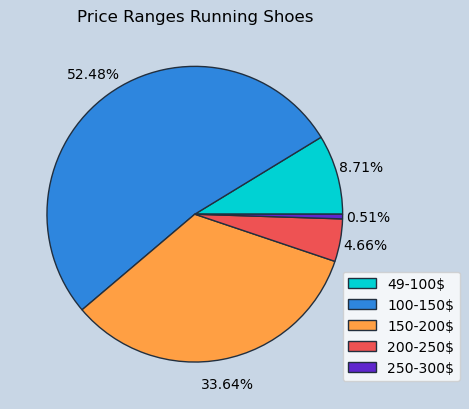

In [169]:
one = men[filt_49_100]["price"].count()
two = men[filt_100_150]["price"].count()
three = men[filt_150_200]["price"].count()
four = men[filt_200_250]["price"].count()
five = men[filt_250_300]["price"].count()

fig = plt.figure()
ax = fig.add_subplot()

five_parts = [one, two, three, four, five]
labels = ["49-100$", "100-150$", "150-200$", "200-250$", "250-300$"]
colours = ["#00d2d3", "#2e86de", "#ff9f43", "#ee5253", "#5f27cd"]

ax.pie(five_parts, colors = colours, autopct ="%1.2f%%", pctdistance = 1.17, wedgeprops= {"edgecolor": "#222f3e"})

ax.set_title("Price Ranges Running Shoes")
ax.legend(labels, loc = [0.9, 0.05])
fig.set_facecolor("#c8d6e5")
plt.show()

# **5. Where are the most discounted shoes in by brand?** 

Which brands have more shoes in discount? Look for the numbers of shoes in discount per brand.

In [133]:
men["discount"]

0        0.0
1      175.0
2      175.0
3      175.0
4        0.0
       ...  
982      0.0
983      0.0
984      0.0
985      0.0
986      0.0
Name: discount, Length: 987, dtype: float64

In [139]:
def format_discount(price):
    if price == 0.0:
        price = "no"
    else: 
        price = "yes"
    return price

men["discount"] = men["discount"].apply(format_discount)
men["discount"]

0       no
1      yes
2      yes
3      yes
4       no
      ... 
982     no
983     no
984     no
985     no
986     no
Name: discount, Length: 987, dtype: object

In [141]:
men[["brand", "discount"]].groupby("brand").count()

,discount
brand,
ASICS,116
Altra,75
Birkenstock,4
Brooks,92
Craft,7
Deckers X Lab,6
HOKA,149
Mizuno,16
NNormal,3


In [153]:
discounts_brand = men[["brand", "discount"]].groupby("brand").count()
discounts_brand = discounts_brand.sort_values("discount")
discounts_brand

,discount
brand,
NNormal,3
Birkenstock,4
inov-8,5
The North Face,5
Deckers X Lab,6
Under Armour,6
Craft,7
Skechers Performance,7
PUMA,15


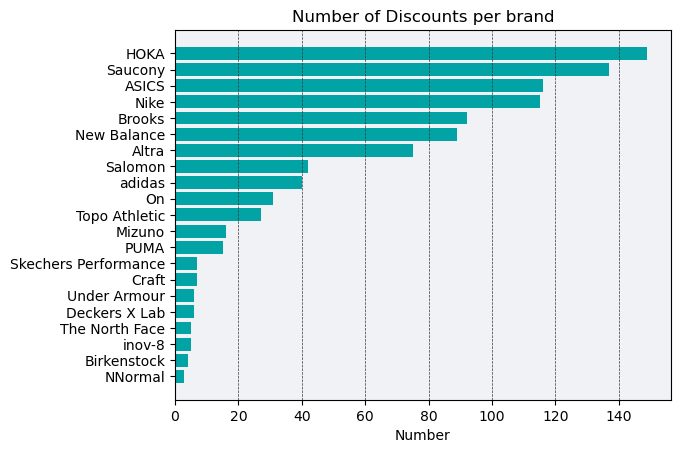

In [168]:
fig = plt.figure()
ax = fig.add_subplot()

ax.barh(discounts_brand.index, discounts_brand["discount"], color = "#01a3a4")
ax.set_title("Number of Discounts per brand")
ax.set_xlabel("Number")
ax.set_facecolor("#f1f2f6")
ax.grid(color = "#2f3542", linestyle = "--", linewidth = 0.5, axis = "x")

plt.show()